# Orientation Code-Along

Jump to [End Result](#Step1)


<hr style="border:2px solid gray">

#<font color='orange'> STEP: 1/3 - Introduction, Imports and Load Datasets


<font color='orange'>**Set Up**: This assigment can be built from an empty notebook on Colab or Jupyter Notebook
</br>
**Problem**: Do we have all the correct packages and dataset for this Python project? 
</br> 
**Solution**: Import and set up your selected dataset. 
</br>
**Build It**: Follow the instructions as stated in the comments or markdown. Use this notebook as a guide and describe the steps you are taking. 


In [ ]:
#import the necessary packages: 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#import the dataset you wish to use, in this example we will use seaborn's mpg dataset
autos = sns.load_dataset("mpg")

In [ ]:
#display the first five rows
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<font color = 'orange'>**Check For Understanding (CFU):**  What do these columns tell us about each individual car? 
</br>
</br>
**Next Step:**  Follow on to the next section. We will use Seaborn to visualize some simple plots. 


<hr style="border:2px solid gray">

#<font color='orange'> STEP: 2/3 Creating a Histogram and a Barplot to Measure Distribution

<font color='orange'>**Problem**: What can we learn from visualizing the distribution of these features? 
</br> 
**Solution**: Use Seaborn to Visualize. Try it out with multiple features. 
</br>
**Build It**: Follow the instructions as stated in the comments or markdown. Use this notebook as a guide and describe the steps you are taking. 

        

In [ ]:

#display you quantitative columns 

autos.select_dtypes('number').columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

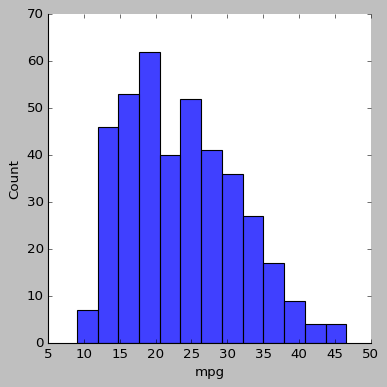

In [ ]:
#use sns.displot to create a histogram
sns.displot(autos['mpg']);

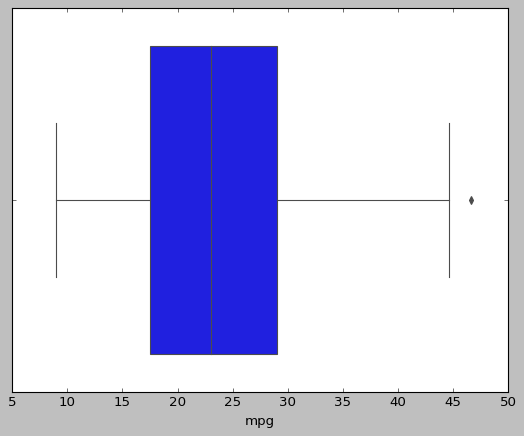

In [ ]:
#use sns.boxplot to create a boxplot

sns.boxplot(data= autos, x='mpg')

In [ ]:
#display the summary statistics using pandas
autos['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<font color = 'orange'>**Check For Understanding (CFU):**  Are there any outliers? 
</br>
</br>
**Next Step:**  Follow on to the next section. We will create a function for reproducibility. 

<hr style="border:2px solid gray">

#<font color='orange'> STEP: 3/3 Create a Function for Efficiency

<font color='orange'>**Problem**: Is there a more efficient method to display the previous information? 
</br> 
**Solution**: Create a function that outputs both a histogram and a boxplot, along with the summary statistics.  
</br>
**Build It**: Follow the instructions as stated in the comments or markdown. Use this notebook as a guide and describe the steps you are taking. 

        

In [ ]:
def show_and_tell(df_name, column_name, display_dataframe=True):
    '''
    Function will return the five point statistics for any pandas column, 
    along with visualizations to measure distributions.
    '''
    #imports
    import pandas as pd 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import seaborn as sns 

    #adjust the fig parameters
    plt.figure(figsize= (20,8))
    plt.style.use('classic')
    
    #create the first and second subplot with matplotlib
    plt.subplot(121)
    plt.title('Histogram', fontsize= 20)
    plt.hist(df_name[str(column_name)])
    
    plt.subplot(122)
    plt.title('Boxplot', fontsize= '20')
    plt.boxplot(df_name[str(column_name)], vert=False)

    plt.show()
    
    #display the summary statistics 
    descr_stats_df = pd.DataFrame(df_name[str(column_name)]).describe()

    if display_dataframe == True:
        display(descr_stats_df)
    else:
        pass


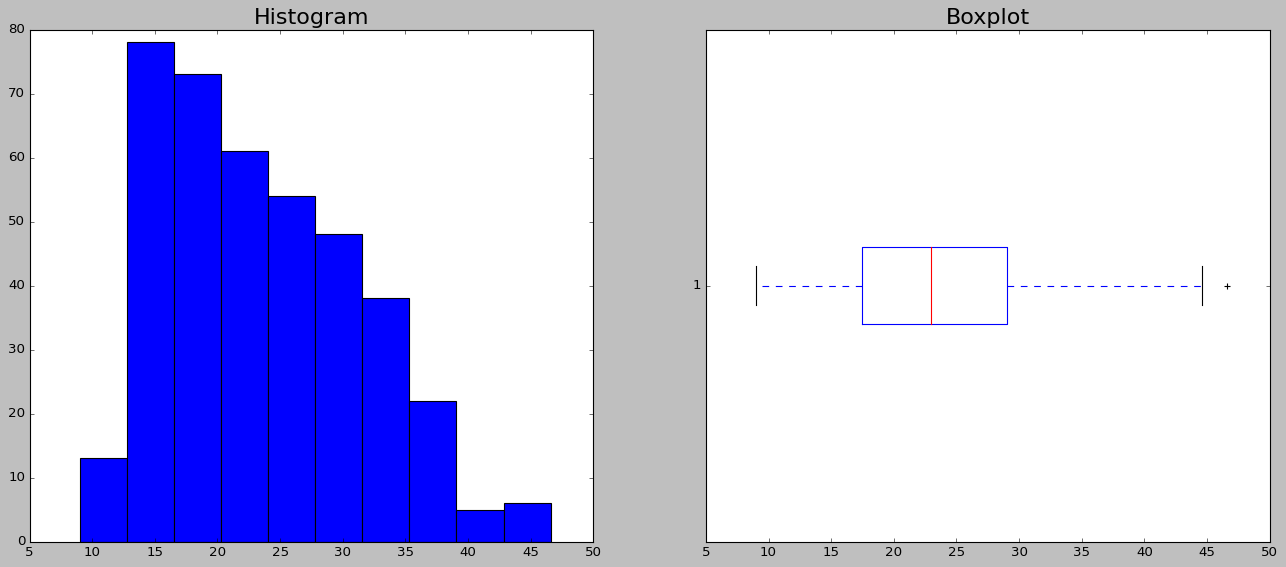

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [ ]:
#test your function, use different features
show_and_tell(autos, 'mpg')

<font color = 'orange'>**Check For Understanding (CFU):**  What do the histograms and the boxplots independently tell us about the features? 
</br>
**Next Step:**  Follow on to the next section. We will create an additonal function to measure and display the outliers.

<hr style="border:2px solid gray">

#<font color='orange'> BONUS STEP: (If time allows) Check for Outliers

<font color='orange'>**Problem**: What are the values for any outliers? 
</br> 
**Solution**: Create a function that displays the outliers for a Pandas series and intergrate it into our original function. 
</br>
**Build It**: Follow the instructions as stated in the comments or markdown. Use this notebook as a guide and describe the steps you are taking. 

        

In [ ]:
#display a result for .quantile()
autos['mpg'].quantile(.25)

17.5

In [ ]:
#create a function that takes a Pandas Series and displays any outliers.
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    #create 
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))].values
    return outliers

In [ ]:
#test the function with a manually-built Pandas Series

print(find_outliers_IQR(pd.Series([-1000, 1, 2, 3, 4, 5, 100, 101 ])))

find_outliers_IQR(autos['mpg'])

[-1000   100   101]


array([46.6])

In [ ]:
#integrate the find_outliers_IQR into the above function

def show_and_tell(df_name, column_name, display_dataframe=True):
    '''
    For use with quantitative values. 
    Function will return the five point statistics for any pandas column, 
    along with visualizations to measure distributions.
    '''

    import pandas as pd 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import seaborn as sns 

    plt.figure(figsize= (28,8))
    plt.style.use('classic')
    
    plt.subplot(121)
    plt.title('Histogram', fontsize= 20)
    plt.hist(df_name[str(column_name)])

    plt.subplot(122)
    plt.title('Boxplot', fontsize= '20')
    plt.boxplot(df_name[str(column_name)], vert=False)

    plt.show()

    descr_stats_df = pd.DataFrame(df_name[str(column_name)]).describe()

    if display_dataframe == True:
        display(descr_stats_df)
        print(f'Outlier Values: ', find_outliers_IQR(df_name[str(column_name)]))
    else:
        pass
    
   

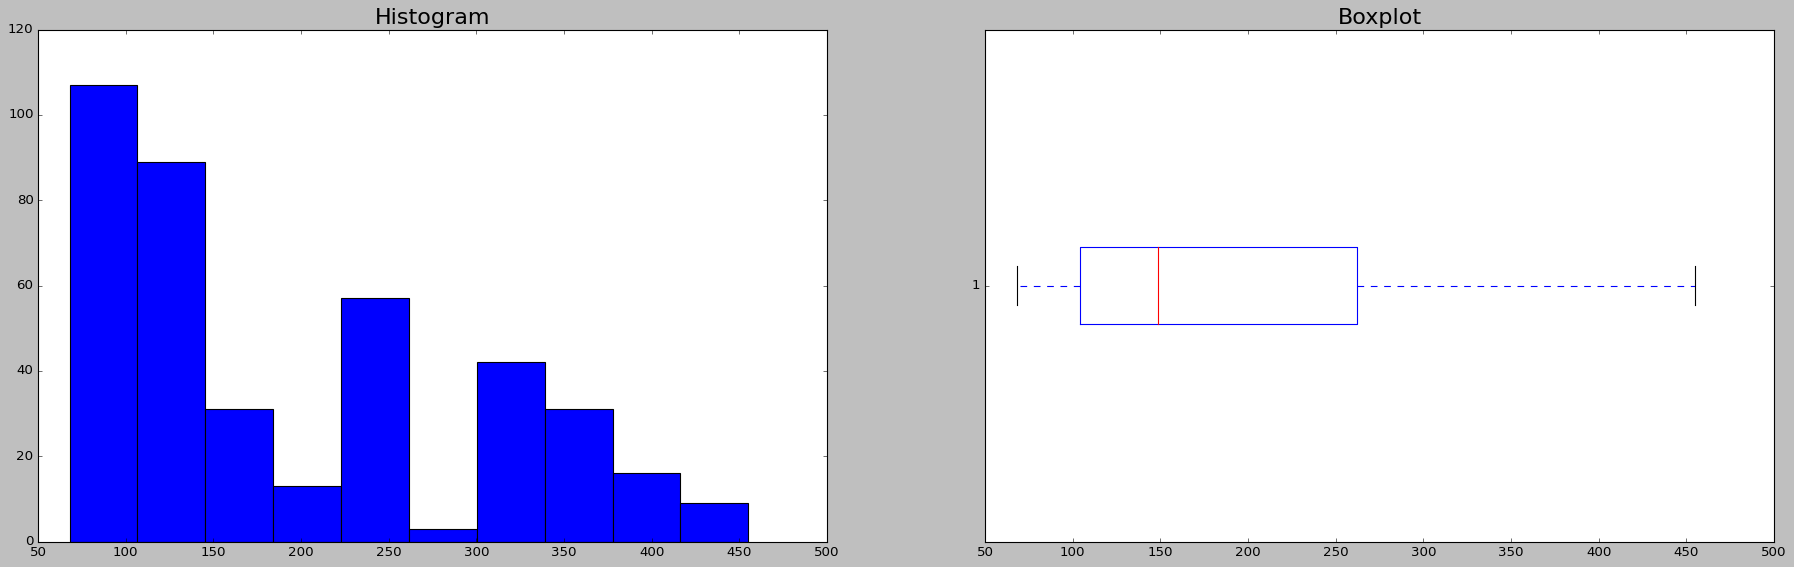

,displacement
count,398.000000
mean,193.425879
std,104.269838
min,68.000000
25%,104.250000
50%,148.500000
75%,262.000000
max,455.000000


Outlier Values:  []


In [ ]:
#test the new function with different variables
show_and_tell(autos, 'displacement')


In [ ]:
#some additional conditions
len(find_outliers_IQR(autos['mpg']))

1

<a name= "Step1"></a>
# End Result

- Click on Runtime --> Run All

In [ ]:
#Display a clarifying message if there are no outliers
def show_and_tell(df_name, column_name, display_dataframe=True):
    '''
    For use with quantitative values. 
    Function will return the five point statistics for any pandas column, 
    along with visualizations to measure distributions.
    '''

    import pandas as pd 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import seaborn as sns 

    plt.figure(figsize= (20,8))
    plt.style.use('classic')
    
    plt.subplot(121)
    plt.title('Histogram', fontsize= 20)
    plt.hist(df_name[str(column_name)])

    plt.subplot(122)
    plt.title('Boxplot', fontsize= '20')
    plt.boxplot(df_name[str(column_name)], vert=False)

    plt.show()

    descr_stats_df = pd.DataFrame(df_name[str(column_name)]).describe()


    #incorporate the message below
    if display_dataframe == True:
        display(descr_stats_df)
        if len(find_outliers_IQR(df_name[str(column_name)])) == 0:
            print("\nNo Outliers")
        else:
            print(f'\nOutlier Values: ', find_outliers_IQR(df_name[str(column_name)]))
    else:
        pass
    
   

### Test with Different Columns in the Second Parameter
- 'mpg'
- 'weight'
- 'displacement'

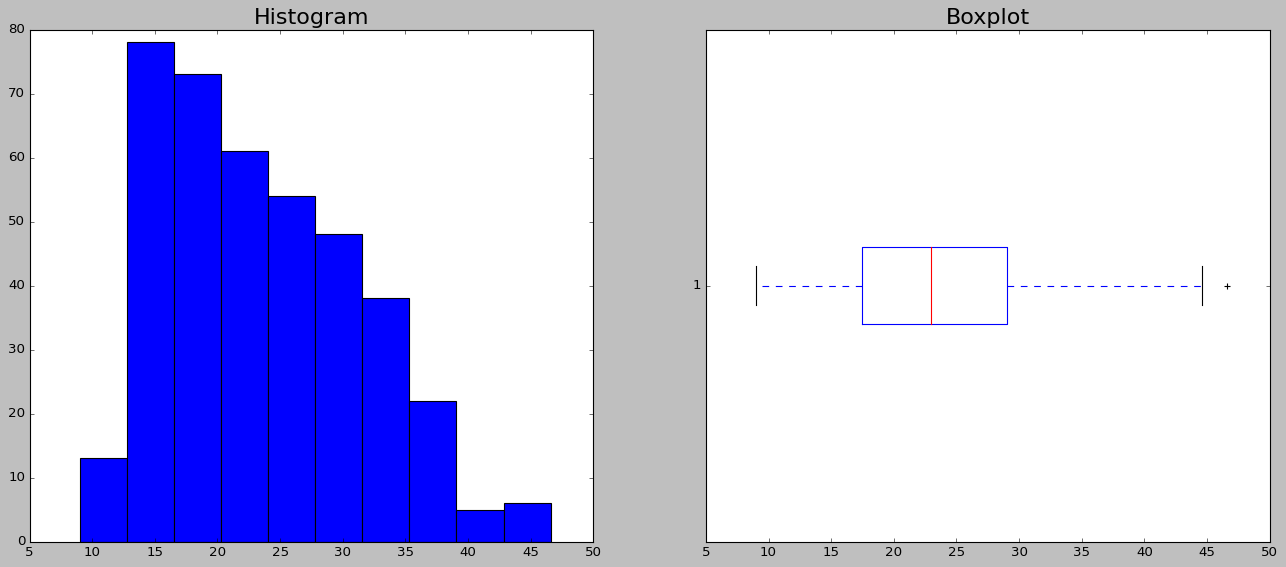

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000



Outlier Values:  [46.6]


In [ ]:
show_and_tell(autos, 'mpg')

<font color = 'orange'>**Check For Understanding (CFU):**  Will this function work with most other Pandas columns from other datasets? Feel free to test it out.

#<font color = 'orange'>**Stop Here**  